# <font color='blue'>Formação Analista de Dados [FADA] - Data Science Academy</font>
# <font color='blue'>Análise de Dados com Linguagem Python</font>

## <font color='blue'>Projeto 10 - Design e Construção de 50 Visualizações</font>
## <font color='blue'>Visualizações de 13 a 26</font>

### Definição do Problema e Fonte de Dados


Neste mini-projeto o objetivo será analisar as características de clientes com base no padrão de compras em um Shopping Center.

## Instalando e Carregando os Pacotes

In [1]:
# Imports
import numpy as np 
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')
sns.set(font_scale = 1.2)

In [3]:
dados = pd.read_csv('dados/dataset3.csv')

In [4]:
dados.shape

(2240, 28)

In [5]:
dados.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [7]:
dados.rename({' Income ' : 'Income'}, axis = 1, inplace = True)

In [8]:
dados['Income'] = dados['Income'].str.replace('$', '')

In [9]:
dados['Income'] = dados['Income'].str.replace(',', '').astype(float)

In [10]:
dados['Dt_Customer'] = pd.to_datetime(dados['Dt_Customer'])

In [11]:
dados.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [12]:
dados['Income'] = dados['Income'].fillna(dados['Income'].mean())

In [13]:
dados['Customer_Age_When_Enrolled'] = dados['Dt_Customer'].dt.year - dados['Year_Birth']

In [14]:
dados[dados['Customer_Age_When_Enrolled'] >= 80]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age_When_Enrolled
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,4,0,0,0,0,0,0,0,SA,121
827,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,0,0,1,0,0,0,0,SP,114
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,5,0,0,0,0,0,0,1,IND,113


In [15]:
dados['Total Spent'] = (dados['MntFishProducts'] + dados['MntWines'] + dados['MntSweetProducts']
                       + dados['MntFruits'] + dados['MntMeatProducts'] + dados['MntGoldProds'] )

In [16]:
dados['Total Purchases'] = (dados['NumDealsPurchases'] + dados['NumWebPurchases'] + dados['NumStorePurchases'] +
                            dados['NumCatalogPurchases'])

In [17]:
dados['Kids_Teen_at_home'] = dados['Kidhome'] + dados['Teenhome']

In [18]:
dados = dados.drop(['Kidhome', 'Teenhome'], axis = 1)

In [19]:
dados.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age_When_Enrolled,Total Spent,Total Purchases,Kids_Teen_at_home
0,1826,1970,Graduation,Divorced,84835.0,2014-06-16,0,189,104,379,...,0,0,0,1,0,SP,44,1190,15,0
1,1,1961,Graduation,Single,57091.0,2014-06-15,0,464,5,64,...,0,0,1,1,0,CA,53,577,18,0
2,10476,1958,Graduation,Married,67267.0,2014-05-13,0,134,11,59,...,0,0,0,0,0,US,56,251,11,1
3,1386,1967,Graduation,Together,32474.0,2014-05-11,0,10,0,1,...,0,0,0,0,0,AUS,47,11,4,2
4,5371,1989,Graduation,Single,21474.0,2014-04-08,0,6,16,24,...,0,0,0,1,0,SP,25,91,8,1


In [20]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          2240 non-null   int64         
 1   Year_Birth                  2240 non-null   int64         
 2   Education                   2240 non-null   object        
 3   Marital_Status              2240 non-null   object        
 4   Income                      2240 non-null   float64       
 5   Dt_Customer                 2240 non-null   datetime64[ns]
 6   Recency                     2240 non-null   int64         
 7   MntWines                    2240 non-null   int64         
 8   MntFruits                   2240 non-null   int64         
 9   MntMeatProducts             2240 non-null   int64         
 10  MntFishProducts             2240 non-null   int64         
 11  MntSweetProducts            2240 non-null   int64       

> ### Dataviz 13 - Boxplot da variável ano de nascimento

<AxesSubplot:>

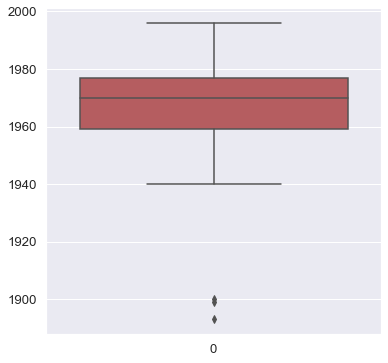

In [21]:
# Dataviz 13
plt.figure(figsize = (6, 6))
sns.boxplot(data = dados['Year_Birth'], color = 'r')

In [22]:
dados = dados[dados['Year_Birth'] >= 1920]

> ### Dataviz 14 - Violin Plot da variável ano de nascimento

<AxesSubplot:>

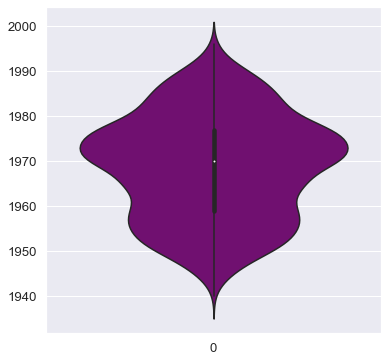

In [23]:
# Dataviz 14
plt.figure(figsize = (6, 6))
sns.violinplot(data = dados['Year_Birth'], color = 'purple')

> ### Dataviz 15 - Count Plot da variável de educação

<AxesSubplot:xlabel='Education', ylabel='count'>

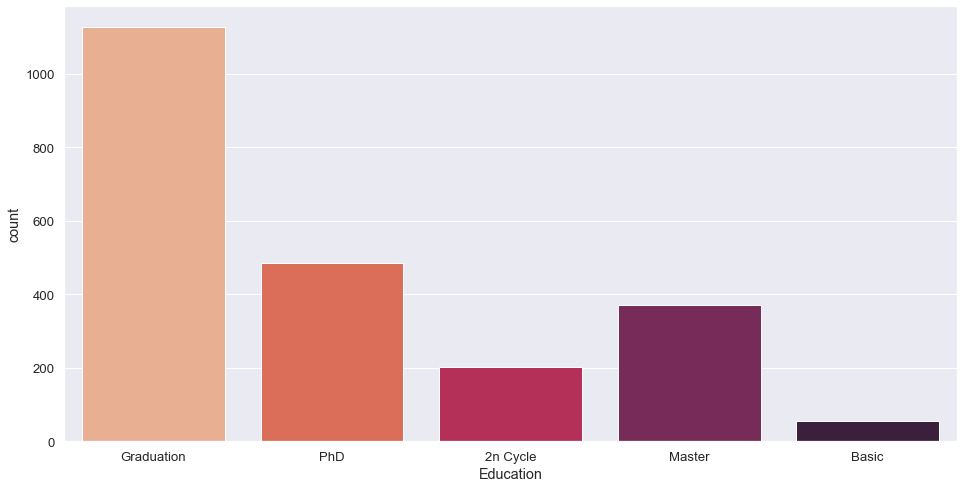

In [24]:
# Dataviz 15
plt.figure(figsize = (16, 8))
sns.countplot(x = dados['Education'], palette = 'rocket_r')

> ### Dataviz 16 - Pie Chart da variável de estado civil

In [25]:
# Ajusta os dados
estado_civil = dados['Marital_Status'].value_counts().to_frame('Count')

In [26]:
estado_civil

,Count
Married,864
Together,579
Single,479
Divorced,231
Widow,77
Alone,3
YOLO,2
Absurd,2


In [27]:
type(estado_civil)

pandas.core.frame.DataFrame

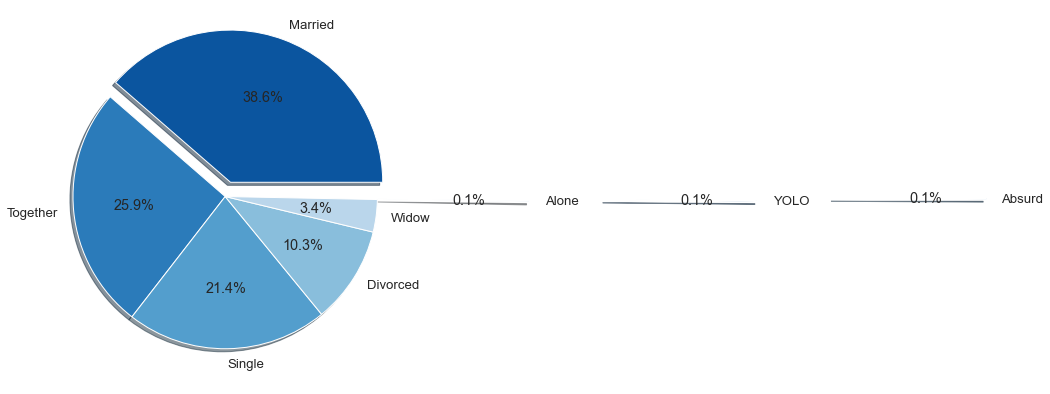

In [28]:
# Dataviz 16
sns.set_palette('Blues_r')
plt.figure(figsize = (7, 7))
plt.pie(estado_civil['Count'], 
        labels = estado_civil.index, 
        explode = (0.1, 0, 0, 0, 0, 1, 2.5, 4), 
        shadow = True, 
        autopct = '%1.1f%%')
plt.show()

> ### Dataviz 17 - Boxplot da variável income

<AxesSubplot:>

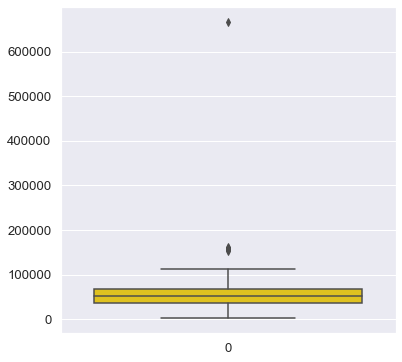

In [29]:
# Dataviz 17
plt.figure(figsize = (6, 6))
sns.boxplot(data = dados['Income'], color = 'gold')

> ### Dataviz 18 - Displot da variável income

Text(0, 0.5, 'Densidade')

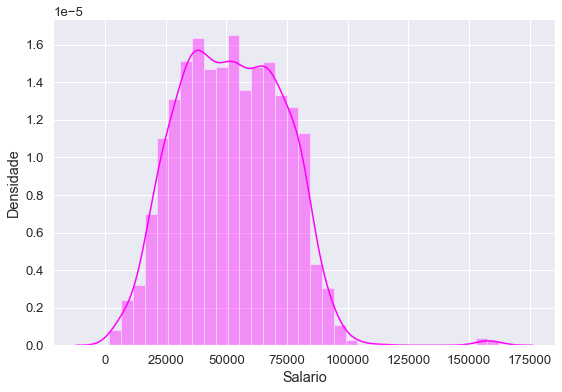

In [30]:
# Dataviz 18
dados = dados[dados['Income'] < 200000]
plt.figure(figsize = (9,6))
sns.distplot(dados['Income'], color = 'magenta')
plt.xlabel('Salario')
plt.ylabel('Densidade')

> ### Dataviz 19 - Violin Plot com a relação da variável income com a variável education

Text(0, 0.5, 'Salario')

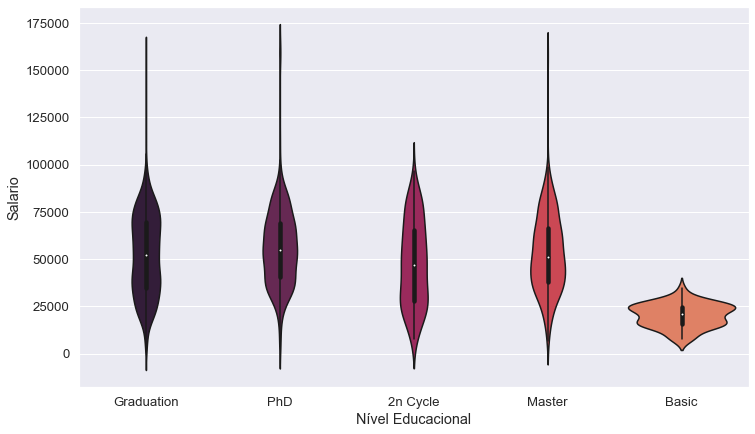

In [31]:
# Dataviz 19
sns.set_palette('rocket')
plt.figure(figsize = (12, 7))
sns.violinplot(y = dados['Income'], x = dados['Education'])
plt.xlabel('Nível Educacional')
plt.ylabel('Salario')

> ### Dataviz 20 - Scatter Plot com a relação da variável income com a variável de gastos com produtos de ouro

Text(0, 0.5, 'Gasto com Produtos de Ouro')

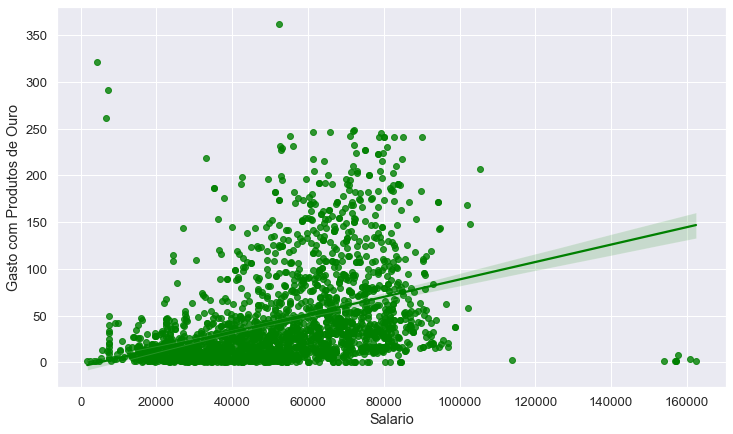

In [32]:
# Dataviz 20
plt.figure(figsize = (12, 7))
sns.regplot(x = dados['Income'], y = dados['MntGoldProds'], color = 'green')
plt.xlabel('Salario')
plt.ylabel('Gasto com Produtos de Ouro')

> ### Dataviz 21 - Scatter Plot com a relação da variável income com a variável de gasto total

Text(0, 0.5, 'Gasto Total em Compras')

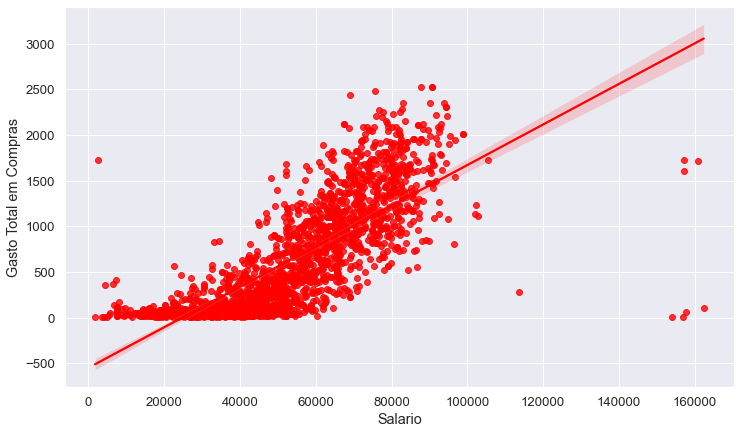

In [33]:
# Dataviz 21
plt.figure(figsize = (12, 7))
sns.regplot(x = dados['Income'], y = dados['Total Spent'], color = 'red')
plt.xlabel('Salario')
plt.ylabel('Gasto Total em Compras')

> ### Dataviz 22 - Distplot da variável Customer_Age_When_Enrolled

Text(0, 0.5, 'Densidade')

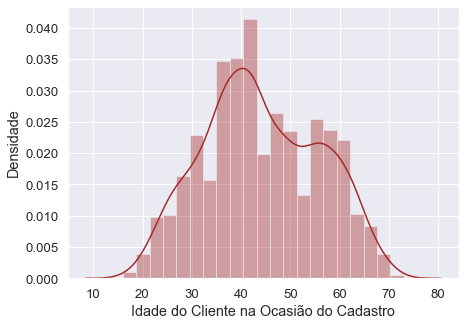

In [34]:
# Dataviz 22
plt.figure(figsize = (7, 5))
sns.distplot(dados['Customer_Age_When_Enrolled'], color = 'brown')
plt.xlabel('Idade do Cliente na Ocasião do Cadastro')
plt.ylabel('Densidade')

> ### Dataviz 23 - Countplot da variável país (contabilizando clientes por país)

Text(0, 0.5, 'Número de Clientes')

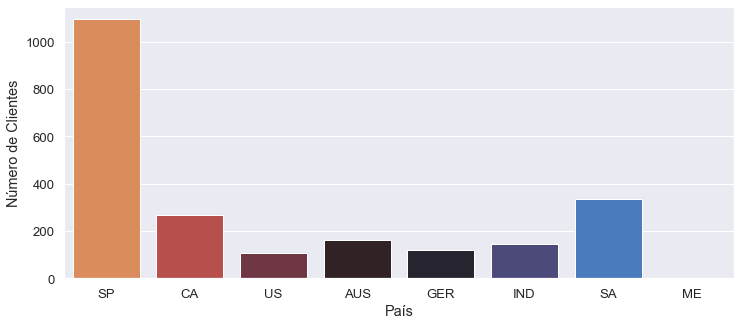

In [35]:
# Dataviz 23
plt.figure(figsize = (12, 5))
sns.countplot(x = dados['Country'], palette = 'icefire_r')
plt.xlabel('País')
plt.ylabel('Número de Clientes')

> ### Dataviz 24 - Violin Plot com a relação entre país e total de compras

<AxesSubplot:xlabel='Country', ylabel='Total Purchases'>

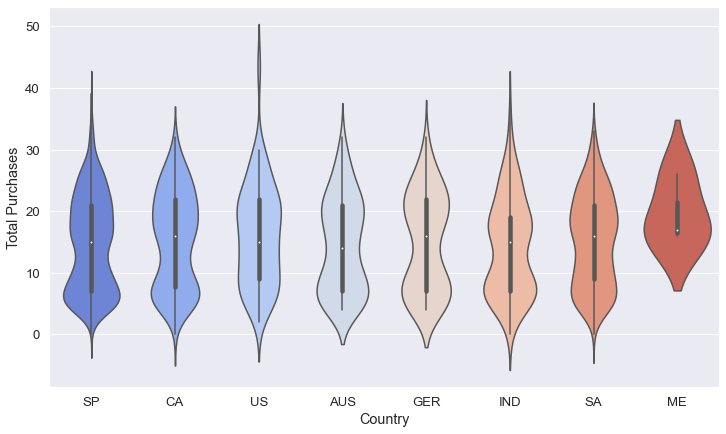

In [36]:
# Dataviz 24
plt.figure(figsize = (12, 7))
sns.violinplot(x = dados['Country'], y = dados['Total Purchases'], palette = 'coolwarm')

> ### Dataviz 25 - Pie Chart do agrupamento da variável de total de compras

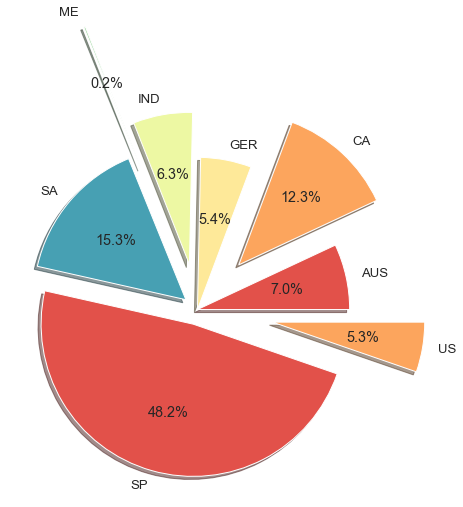

In [37]:
# Dataviz 25
pm = dados[['Total Purchases', 'Country']].groupby(['Country']).agg([sum])

sns.set_palette('Spectral')
plt.figure(figsize = (7, 7))
plt.pie(pm['Total Purchases']['sum'], 
        labels = pm.index, 
        explode = (0, 0.4, 0, 0.3, 1, 0.1, 0.1, 0.5),
        shadow = True, 
        autopct = '%1.1f%%')
plt.show()

> ### Dataviz 26 - Countplot da variável com a data cadastro do cliente

Text(0, 0.5, 'Número de Cadstros')

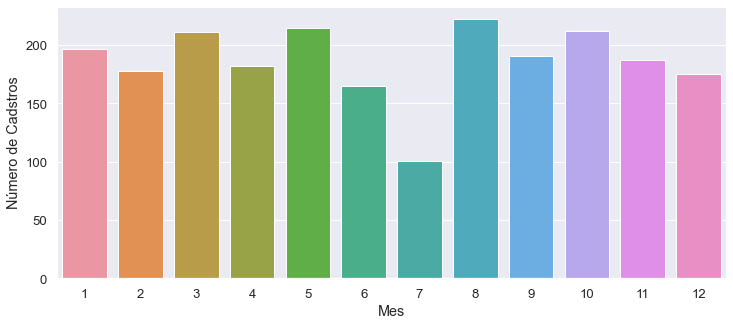

In [38]:
# Dataviz 26
plt.figure(figsize = (12, 5))
sns.countplot(x = dados['Dt_Customer'].dt.month)
plt.xlabel('Mes')
plt.ylabel('Número de Cadstros')

# Fim